In [ ]:
from google.colab import files
import pandas as pd

#uploaded = files.upload()
#myCSV = pd.read_csv('myCSV.csv', delimiter=';')
#uploaded = files.upload()
#partnerCSV = pd.read_csv('KatyaVoronina3.csv', delimiter=',')
uploaded = files.upload()
otherCSV = pd.read_csv('otherCSV.csv', delimiter=';')

Saving otherCSV.csv to otherCSV.csv


1) евклидово расстояние между векторами без нормализации

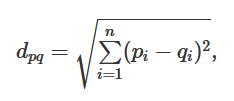

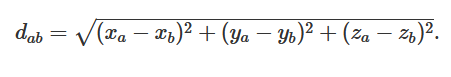

2) манхэттенское расстояние без нормализации

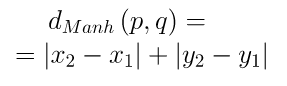

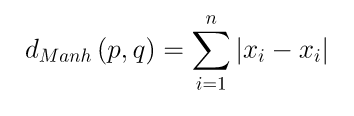

3) Евклидово расстояние с нормализацией(s - стандартное отклонение)
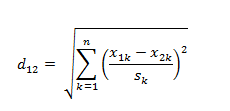

4) Манхэттенское расстояние с нормализацией - пункт 2 и деление на стандартное отклонение

In [ ]:
import math

def euclideanDistance(object1, object2, length):
    dist = 0
    for x in range(length):
        dist += (object1[x] - object2[x]) * (object1[x] - object2[x])
    return math.sqrt(dist)

def manhettanDistance(object1, object2, length):
    dist = 0
    for x in range(length):
        dist += math.abs(object1[x] - object2[x])
    return dist

def euclideanDistanceNormalize(object1, object2, length, s):
    dist = 0
    for x in range(length):
        dist += (object1[x] - object2[x]) * (object1[x] - object2[x])
    return math.sqrt(dist) / s

def manhettanDistanceNormalize(object1, object2, length, s):
    dist = 0
    for x in range(length):
        dist += math.abs(object1[x] - object2[x])
    return dist / s

In [ ]:
# 5) Бинарные признаки
sodium = []
for index, row in otherCSV.iterrows():
  if row["Sodium_(mg)"] > 200:
    sodium.append(1)
  else:
    sodium.append(0)

fiber_td = []
for index, row in otherCSV.iterrows():
  if row["Fiber_TD_(g)"] > 0:
    fiber_td.append(1)
  else:
    fiber_td.append(0)

otherCSV.insert(10, "Bin_Sodium", sodium, True)
otherCSV.insert(10, "Bin_Fiber_TD", fiber_td, True)

In [ ]:
# 6) otherCSV.csv
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(otherCSV['Shrt_Desc'])
stringColumn2 = le.fit_transform(otherCSV['GmWt_Desc1'])
stringColumn3 = le.fit_transform(otherCSV['GmWt_Desc2'])

otherCSV = otherCSV.drop('Shrt_Desc', axis=1)
otherCSV = otherCSV.drop('GmWt_Desc1', axis=1)
otherCSV = otherCSV.drop('GmWt_Desc2', axis=1)

otherCSV.insert(10, 'Shrt_Desc', stringColumn1, True)
otherCSV.insert(10, 'GmWt_Desc1', stringColumn2, True)
otherCSV.insert(10, 'GmWt_Desc2', stringColumn3, True)

otherCSV = otherCSV.fillna(0)
print(np.any(np.isnan(otherCSV)))

X = otherCSV.loc[:, otherCSV.columns != 'CLASS']
Y = otherCSV['CLASS']

# разделение данных на тренировочные и тестируемые
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test = scaler.transform(x_test_data)

model = KNeighborsClassifier(n_neighbors= 5)
model.fit(X_train, y_training_data)
predictions = model.predict(X_test)

print(classification_report(y_test_data, predictions))

False
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       676
           1       0.77      0.91      0.84       286
          10       0.89      0.88      0.89       673
          11       0.72      0.52      0.60       123

    accuracy                           0.86      1758
   macro avg       0.82      0.80      0.80      1758
weighted avg       0.86      0.86      0.85      1758



In [ ]:
# 7 myCSV.csv
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(myCSV['Shrt_Desc'])
stringColumn2 = le.fit_transform(myCSV['GmWt_Desc1'])
stringColumn3 = le.fit_transform(myCSV['GmWt_Desc2'])

myCSV = myCSV.drop('Shrt_Desc', axis=1)
myCSV = myCSV.drop('GmWt_Desc1', axis=1)
myCSV = myCSV.drop('GmWt_Desc2', axis=1)

myCSV.insert(10, 'Shrt_Desc', stringColumn1, True)
myCSV.insert(10, 'GmWt_Desc1', stringColumn2, True)
myCSV.insert(10, 'GmWt_Desc2', stringColumn3, True)

myCSV = myCSV.fillna(0)
print(np.any(np.isnan(myCSV)))

X = myCSV.loc[:, myCSV.columns != 'class']
Y = myCSV['class']

# разделение данных на тренировочные и тестируемые
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test = scaler.transform(x_test_data)

model = KNeighborsClassifier(n_neighbors= 5)
model.fit(X_train, y_training_data)
predictions = model.predict(X_test)

print(classification_report(y_test_data, predictions))

False
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       468
           1       0.88      0.86      0.87       522
           2       0.92      0.94      0.93       768

    accuracy                           0.92      1758
   macro avg       0.92      0.92      0.92      1758
weighted avg       0.92      0.92      0.92      1758



In [ ]:
# 8) partnerCSV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(partnerCSV['Shrt_Desc'])
stringColumn2 = le.fit_transform(partnerCSV['GmWt_Desc1'])
stringColumn3 = le.fit_transform(partnerCSV['GmWt_Desc2'])

partnerCSV = partnerCSV.drop('Shrt_Desc', axis=1)
partnerCSV = partnerCSV.drop('GmWt_Desc1', axis=1)
partnerCSV = partnerCSV.drop('GmWt_Desc2', axis=1)

partnerCSV.insert(10, 'Shrt_Desc', stringColumn1, True)
partnerCSV.insert(10, 'GmWt_Desc1', stringColumn2, True)
partnerCSV.insert(10, 'GmWt_Desc2', stringColumn3, True)

partnerCSV = partnerCSV.fillna(0)
print(np.any(np.isnan(partnerCSV)))

X = partnerCSV.loc[:, partnerCSV.columns != 'class 3']
Y = partnerCSV['class 3']

# разделение данных на тренировочные и тестируемые
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test = scaler.transform(x_test_data)

model = KNeighborsClassifier(n_neighbors= 5)
model.fit(X_train, y_training_data)
predictions = model.predict(X_test)

print(classification_report(y_test_data, predictions))

False
              precision    recall  f1-score   support

           1       0.77      0.83      0.80       238
           2       0.91      0.92      0.92       994
           3       0.95      0.91      0.93       526

    accuracy                           0.90      1758
   macro avg       0.88      0.89      0.88      1758
weighted avg       0.91      0.90      0.90      1758

